In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [50]:
x_train = pd.read_csv('X_train.csv', header=None, sep=' ', low_memory=False)
y_train = pd.read_csv('Y_train.csv', header=None, sep=' ', names=['classlabel'])

x_test = pd.read_csv('X_test.csv', header=None, sep=' ', low_memory=False)
y_test = pd.read_csv('Y_test.csv', header=None, low_memory=False, names=['classlabel'])

In [51]:

vocab = x_train.iloc[0].values
print(type(vocab))
x_train = x_train.drop(0).reset_index(drop=True)
x_test = x_test.drop(0).reset_index(drop=True)
x_test.columns = vocab
x_train.columns = vocab

<class 'numpy.ndarray'>


In [52]:
class_vals = y_train['classlabel'].value_counts()
class_vals


classlabel
3    377
0    375
2    319
4    313
1    284
Name: count, dtype: int64

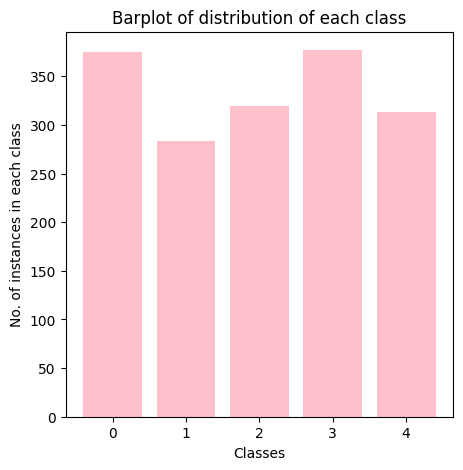

In [53]:
fig, axes = plt.subplots(figsize=(5,5), dpi=100)
plt.bar(class_vals.index, height=class_vals, color ='pink')
plt.xlabel("Classes")
plt.ylabel("No. of instances in each class")
plt.title('Barplot of distribution of each class');

In [54]:
x_test = x_test.apply(pd.to_numeric, errors='coerce').astype('Int64')
x_train = x_train.apply(pd.to_numeric, errors='coerce').astype('Int64')
y_test = y_test.apply(pd.to_numeric, errors='coerce').astype('Int64')
y_train = y_train.apply(pd.to_numeric, errors='coerce').astype('Int64')

In [55]:
train = pd.concat([x_train, y_train], axis=1)
train

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour,classlabel
0,1,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1664,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
1665,0,0,0,1,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,4
1666,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1


In [56]:
train.head()

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour,classlabel
0,1,1,0,0,0,0,0,4,1,0,...,0,0,0,0,0,0,0,0,0,4
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
3,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
train.describe()

,ad,sale,boost,time,warner,profit,quarterli,media,giant,jump,...,denialofservic,ddo,seagrav,bot,wirelessli,streamcast,peripher,headphon,flavour,classlabel
count,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,...,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0,1668.0
mean,0.378297,0.306954,0.09952,0.664269,0.01199,0.128897,0.007194,0.146882,0.080336,0.047962,...,0.001799,0.005396,0.006595,0.013189,0.0006,0.002998,0.002398,0.001799,0.001199,1.981415
std,0.683289,1.137473,0.383743,1.165385,0.17621,0.67844,0.084539,0.629705,0.297192,0.356753,...,0.042384,0.140595,0.174787,0.293613,0.024485,0.073416,0.059946,0.042384,0.034617,1.43075
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
75%,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0
max,5.0,15.0,3.0,22.0,5.0,10.0,1.0,11.0,2.0,9.0,...,1.0,4.0,5.0,10.0,1.0,2.0,2.0,1.0,1.0,4.0


In [58]:
# Assuming you have loaded your y_train and y_test DataFrames
train_percentages = y_train['classlabel'].value_counts(normalize=True) * 100
test_percentages = y_test['classlabel'].value_counts(normalize=True) * 100

# Print the percentages
print("Training Set Percentages:")
print(train_percentages)

print("\nTest Set Percentages:")
print(test_percentages)


Training Set Percentages:
classlabel
3    22.601918
0    22.482014
2      19.1247
4    18.764988
1    17.026379
Name: proportion, dtype: Float64

Test Set Percentages:
classlabel
0    24.236984
3    24.057451
1    18.312388
2    17.594255
4    15.798923
Name: proportion, dtype: Float64


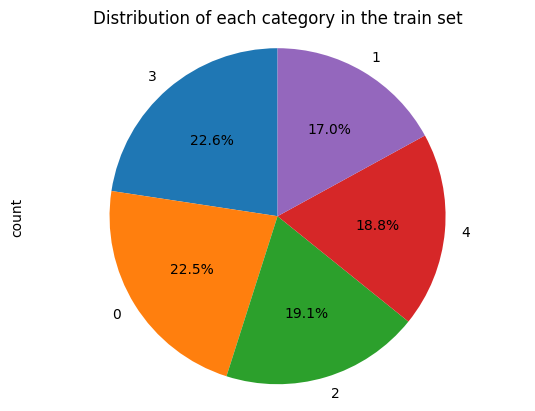

In [59]:
result_counts = y_train['classlabel'].value_counts()

# Plotting a pie chart
result_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of each category in the train set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

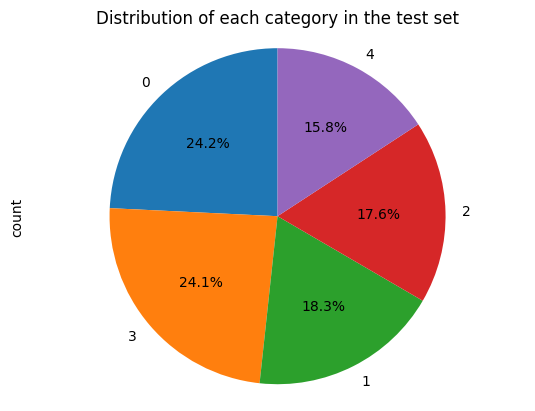

In [60]:
result_counts = y_test['classlabel'].value_counts()

# Plotting a pie chart
result_counts.plot.pie(autopct='%1.1f%%', startangle=90)
plt.title('Distribution of each category in the test set')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [61]:
x_train.shape[0]

1668

In [62]:
# Assuming you have a DataFrame df_train with the training data
tech_documents = train[train['classlabel'] == 4]

# Frequency of words in Tech documents
alien_freq = tech_documents['alien'].sum()
thunder_freq = tech_documents['thunder'].sum()

# Log ratios
log_alien = np.log(alien_freq / len(tech_documents) )
log_thunder = np.log(thunder_freq / len(tech_documents))


print(f"Frequencies: Alien - {alien_freq}, Thunder - {thunder_freq}")
print(f"Log Ratio: Alien - {log_alien}, Thunder - {log_thunder}")

Frequencies: Alien - 3, Thunder - 0
Log Ratio: Alien - -4.647590901872044, Thunder - -inf


C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\2399817773.py:10: RuntimeWarning: divide by zero encountered in log
  log_thunder = np.log(thunder_freq / len(tech_documents))


In [63]:
features = train.columns.tolist()

In [64]:
#FEATURE EXTRACTION
features.pop()
len(features)

9635

Multinomial Naive Bayes Model

In [65]:
# set prior probabilities
prior_0 = train.loc[train['classlabel'] == 0].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_0')
prior_1 = train.loc[train['classlabel'] == 1].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_1')
prior_2 = train.loc[train['classlabel'] == 2].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_2')
prior_3 = train.loc[train['classlabel'] == 3].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_3')
prior_4 = train.loc[train['classlabel'] == 4].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_4')


total_prior = x_train.select_dtypes(np.number).sum().rename('total_prior')

# get the total number of words in each class
total_word_cnt_0 = train.loc[train['classlabel'] == 0].iloc[:, :-1].select_dtypes(np.number).values.sum()
total_word_cnt_1 = train.loc[train['classlabel'] == 1].iloc[:, :-1].select_dtypes(np.number).values.sum()
total_word_cnt_2 = train.loc[train['classlabel'] == 2].iloc[:, :-1].select_dtypes(np.number).values.sum()
total_word_cnt_3 = train.loc[train['classlabel'] == 3].iloc[:, :-1].select_dtypes(np.number).values.sum()
total_word_cnt_4 = train.loc[train['classlabel'] == 4].iloc[:, :-1].select_dtypes(np.number).values.sum()

# get prior probabilities of labels
pr_prob_0 = train.loc[train['classlabel'] == 0].shape[0] / x_train.shape[0]
pr_prob_1 = train.loc[train['classlabel'] == 1].shape[0] / x_train.shape[0]
pr_prob_2 = train.loc[train['classlabel'] == 2].shape[0] / x_train.shape[0]
pr_prob_3 = train.loc[train['classlabel'] == 3].shape[0] / x_train.shape[0]
pr_prob_4 = train.loc[train['classlabel'] == 4].shape[0] / x_train.shape[0]

# get the ln for each label prior
pr_prob_ln_0 = np.log(pr_prob_0)
pr_prob_ln_1 = np.log(pr_prob_1)
pr_prob_ln_2 = np.log(pr_prob_2)
pr_prob_ln_3 = np.log(pr_prob_3)
pr_prob_ln_4 = np.log(pr_prob_4)



In [66]:
bussiness_matrix = train.loc[train['classlabel'] == 0]
print('Number of bussiness news in the training data: ' + str(bussiness_matrix.shape[0]))
print('Total number of news: ' + str(train.shape[0]))
print('Percentage of bussiness news: ' + str(bussiness_matrix.shape[0]/train.shape[0]))

Number of bussiness news in the training data: 375
Total number of news: 1668
Percentage of bussiness news: 0.22482014388489208


In [67]:
def calc_accuracy(ground_truth_labels, predicted_labels):
	correct = 0
	# Pairs of the ground truth and predicted labels
	for gt_label, pred_label in zip(ground_truth_labels, predicted_labels):
		if gt_label == pred_label:
			correct += 1
	return (correct/len(ground_truth_labels))

MLE estimator

In [68]:
prior_prb_0 = np.log(prior_0.values / total_word_cnt_0)
prior_prb_1 = np.log(prior_1.values / total_word_cnt_1)
prior_prb_2 = np.log(prior_2.values / total_word_cnt_2)
prior_prb_3 = np.log(prior_3.values / total_word_cnt_3)
prior_prb_4 = np.log(prior_4.values / total_word_cnt_4)



C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\692630689.py:1: RuntimeWarning: divide by zero encountered in log
  prior_prb_0 = np.log(prior_0.values / total_word_cnt_0)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\692630689.py:2: RuntimeWarning: divide by zero encountered in log
  prior_prb_1 = np.log(prior_1.values / total_word_cnt_1)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\692630689.py:3: RuntimeWarning: divide by zero encountered in log
  prior_prb_2 = np.log(prior_2.values / total_word_cnt_2)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\692630689.py:4: RuntimeWarning: divide by zero encountered in log
  prior_prb_3 = np.log(prior_3.values / total_word_cnt_3)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\692630689.py:5: RuntimeWarning: divide by zero encountered in log
  prior_prb_4 = np.log(prior_4.values / total_word_cnt_4)


In [69]:
# Run the prediction for each test sample
mle_test_prediction = np.zeros((x_test.shape[0], 5))  # Initialize the prediction matrix

for i in range(x_test.shape[0]):
    row = x_test.iloc[i].values
    row = np.nan_to_num(row).astype(float)
    mle_test_prediction[i, 0] = pr_prob_ln_0 + np.sum(prior_prb_0 * row)
    mle_test_prediction[i, 1] = pr_prob_ln_1 + np.sum(prior_prb_1 * row)
    mle_test_prediction[i, 2] = pr_prob_ln_2 + np.sum(prior_prb_2 * row)
    mle_test_prediction[i, 3] = pr_prob_ln_3 + np.sum(prior_prb_3 * row)
    mle_test_prediction[i, 4] = pr_prob_ln_4 + np.sum(prior_prb_4 * row)
    predicted_classes = np.argmax(mle_test_prediction, axis=1)

# Get the predicted classes
predicted_classes = np.argmax(mle_test_prediction, axis=1)


C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\327286961.py:7: RuntimeWarning: invalid value encountered in multiply
  mle_test_prediction[i, 0] = pr_prob_ln_0 + np.sum(prior_prb_0 * row)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\327286961.py:8: RuntimeWarning: invalid value encountered in multiply
  mle_test_prediction[i, 1] = pr_prob_ln_1 + np.sum(prior_prb_1 * row)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\327286961.py:9: RuntimeWarning: invalid value encountered in multiply
  mle_test_prediction[i, 2] = pr_prob_ln_2 + np.sum(prior_prb_2 * row)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\327286961.py:10: RuntimeWarning: invalid value encountered in multiply
  mle_test_prediction[i, 3] = pr_prob_ln_3 + np.sum(prior_prb_3 * row)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152\327286961.py:11: RuntimeWarning: invalid value encountered in multiply
  mle_test_prediction[i, 4] = pr_prob_ln_4 + np.sum(prior_prb_4 * row)
C:\Users\ipek\AppData\Local\Temp\ipykernel_14152

In [70]:
dataset_y=y_test.values[:,-1]
ground_truth_labels = dataset_y[:len(y_test.values)]

In [71]:
calc_accuracy(ground_truth_labels, predicted_classes)


0.24236983842010773

In [72]:
#confusion matrix for the MLE estimator
confusion = np.zeros((5,5))
test_y = y_test.values
correct = 0
for gt_label, pred_label in zip(ground_truth_labels, predicted_classes):
    correct += 1
    confusion[int(gt_label)][int(pred_label)] +=1
print(confusion)

[[135.   0.   0.   0.   0.]
 [102.   0.   0.   0.   0.]
 [ 98.   0.   0.   0.   0.]
 [134.   0.   0.   0.   0.]
 [ 88.   0.   0.   0.   0.]]


In [73]:
mle_test_prediction

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       ...,
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

In [74]:
predicted_classes

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

MAP ESTIMATION

In [75]:
alpha = 1
V = len(features)
prior_prb_0 = np.log((prior_0.values + alpha)/ (total_word_cnt_0 + (alpha*V)))
prior_prb_1 = np.log((prior_1.values + alpha)/ (total_word_cnt_1 + (alpha*V)))
prior_prb_2 = np.log((prior_2.values + alpha)/ (total_word_cnt_2 + (alpha*V)))
prior_prb_3 = np.log((prior_3.values + alpha)/ (total_word_cnt_3 + (alpha*V)))
prior_prb_4 = np.log((prior_4.values + alpha)/ (total_word_cnt_4 + (alpha*V)))


# Run the prediction for each test sample
map_test_prediction = np.zeros((x_test.shape[0], 5))  # Initialize the prediction matrix

for i in range(x_test.shape[0]):
    row = x_test.iloc[i].values
    row = np.nan_to_num(row).astype(float)
    map_test_prediction[i, 0] = pr_prob_ln_0 + np.nansum(prior_prb_0 * row)
    map_test_prediction[i, 1] = pr_prob_ln_1 + np.nansum(prior_prb_1 * row)
    map_test_prediction[i, 2] = pr_prob_ln_2 + np.nansum(prior_prb_2 * row)
    map_test_prediction[i, 3] = pr_prob_ln_3 + np.nansum(prior_prb_3 * row)
    map_test_prediction[i, 4] = pr_prob_ln_4 + np.nansum(prior_prb_4 * row)

# Get the predicted classes
predicted_classes_map = np.argmax(map_test_prediction, axis=1)


In [76]:
calc_accuracy(ground_truth_labels, predicted_classes_map)


0.9766606822262118

Confusion Matrix

In [ ]:
#confusion matrix for the MLE estimator
confusion = np.zeros((5,5))
correct = 0
for gt_label, pred_label in zip(ground_truth_labels, predicted_classes_map):
    correct += 1
    confusion[int(gt_label)][int(pred_label)] +=1
print(confusion)

[[131.   0.   2.   0.   2.]
 [  0.  97.   0.   0.   5.]
 [  1.   0.  96.   0.   1.]
 [  0.   0.   1. 133.   0.]
 [  1.   0.   0.   0.  87.]]


Bernoulli Naive Bayes Model

In [ ]:
# convert training data to 1/0s for the bernoulli classifier
x_train_br = x_train.copy()
x_train_br[x_train_br != 0] = 1

# concatenate features and labels for easy grouping
train_br = pd.concat([x_train_br, y_train], axis=1)

# set prior probabilities
# get the negative priors for each word
prior_br_0 = train_br.loc[train['classlabel'] == 0].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_0')
prior_br_1 = train_br.loc[train['classlabel'] == 1].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_1')
prior_br_2 = train_br.loc[train['classlabel'] == 2].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_2')
prior_br_3 = train_br.loc[train['classlabel'] == 3].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_3')
prior_br_4 = train_br.loc[train['classlabel'] == 4].iloc[:, :-1].select_dtypes(np.number).sum().rename('total_4')


total_prior_br = x_train_br.select_dtypes(np.number).sum().rename('total_prior')

total_0 = train.loc[train['classlabel'] == 0].shape[0]
total_1 = train.loc[train['classlabel'] == 1].shape[0]
total_2 = train.loc[train['classlabel'] == 2].shape[0]
total_3 = train.loc[train['classlabel'] == 3].shape[0]
total_4 = train.loc[train['classlabel'] == 4].shape[0]


# get prior probabilities of labels
pr_prob_0 = total_0 / x_train.shape[0]
pr_prob_1 = total_1 / x_train.shape[0]
pr_prob_2 = total_2 / x_train.shape[0]
pr_prob_3 = total_3 / x_train.shape[0]
pr_prob_4 = total_4 / x_train.shape[0]

# get the ln for each label prior
pr_prob_ln_0 = np.log(pr_prob_0)
pr_prob_ln_1 = np.log(pr_prob_1)
pr_prob_ln_2 = np.log(pr_prob_2)
pr_prob_ln_3 = np.log(pr_prob_3)
pr_prob_ln_4 = np.log(pr_prob_4)




In [ ]:
row = x_test_br.iloc[1].values
row = np.nan_to_num(row).astype(float)
1-row

array([0., 1., 1., ..., 1., 1., 1.])

In [ ]:
alpha = 1
# transform the test features to 1/0s
x_test_br = x_test.copy()
x_test_br[x_test_br != 0] = 1

#calcluate the probabilities for each word and also their compliments
prior_prb_0 = (prior_br_0 + alpha)/(total_0 + 2*alpha)
prior_prb_1 = (prior_br_1 + alpha) /(total_1 + 2*alpha)
prior_prb_2 = (prior_br_2 + alpha)/(total_2 + 2*alpha)
prior_prb_3 = (prior_br_3 + alpha) /(total_3 + 2*alpha)
prior_prb_4 = (prior_br_4 + alpha)/(total_4 + 2*alpha)

prior_prb_cmp_0 = 1-prior_prb_0
prior_prb_cmp_1 = 1-prior_prb_1
prior_prb_cmp_2 = 1-prior_prb_2
prior_prb_cmp_3 = 1-prior_prb_3
prior_prb_cmp_4 = 1-prior_prb_4


#run the prediction for each test sample
mle_test_prediction_br = np.zeros((x_test.shape[0], 5))  # Initialize the prediction matrix


for i in range(x_test_br.shape[0]):
    row = x_test_br.iloc[i].values
    row = np.nan_to_num(row).astype(float)
    row_cmp = 1 - row

    t0 = prior_prb_0 * row + prior_prb_cmp_0 * row_cmp
    t1 = prior_prb_1 * row + prior_prb_cmp_1 * row_cmp
    t2 = prior_prb_2 * row + prior_prb_cmp_2 * row_cmp
    t3 = prior_prb_3 * row + prior_prb_cmp_3 * row_cmp
    t4 = prior_prb_4 * row + prior_prb_cmp_4 * row_cmp

    mle_test_prediction_br[i, 0] = pr_prob_ln_0 + np.sum(np.log(t0.fillna(0)))
    mle_test_prediction_br[i, 1] = pr_prob_ln_1 + np.sum(np.log(t1.fillna(0)))
    mle_test_prediction_br[i, 2] = pr_prob_ln_2 + np.sum(np.log(t2.fillna(0)))
    mle_test_prediction_br[i, 3] = pr_prob_ln_3 + np.sum(np.log(t3.fillna(0)))
    mle_test_prediction_br[i, 4] = pr_prob_ln_4 + np.sum(np.log(t4.fillna(0)))

# Get the predicted classes
predicted_classes_br = np.argmax(mle_test_prediction_br, axis=1)



In [ ]:
calc_accuracy(ground_truth_labels, predicted_classes_br)


0.9658886894075404

In [ ]:
#confusion matrix for the MLE estimator
confusion = np.zeros((5,5))
test_y = y_test.values
correct = 0
for gt_label, pred_label in zip(ground_truth_labels, predicted_classes_br):
    correct += 1
    confusion[int(gt_label)][int(pred_label)] +=1
print(confusion)

[[132.   0.   2.   0.   1.]
 [  3.  96.   1.   0.   2.]
 [  4.   0.  94.   0.   0.]
 [  0.   0.   0. 134.   0.]
 [  4.   2.   0.   0.  82.]]
